In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt  # for making figures
%matplotlib inline

In [2]:
# read in all words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
# build the vacabulaeyr of characters and mapping to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one ?
X, Y = [], []
for w in words[:5]:
    
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]  # crop and append
        
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [7]:
C = torch.randn((27, 2))

In [8]:
C[5]

tensor([ 0.5034, -0.1983])

In [9]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([ 0.5034, -0.1983])

In [10]:
C[5]

tensor([ 0.5034, -0.1983])

In [11]:
C[X].shape

torch.Size([32, 3, 2])

In [12]:
X[13, 2]

tensor(1)

In [13]:
C[X][13, 2]

tensor([0.3617, 1.0623])

In [14]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [15]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [16]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [17]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [18]:
a.shape

torch.Size([18])

In [19]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [20]:
a.storage()

C:\Users\tushar.thoriya\AppData\Local\Temp\ipykernel_1376\214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [21]:
# w1 weights 
w1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [22]:
h = torch.tanh((emb.view(32, 6) @ w1) + b1)

In [23]:
h

tensor([[ 0.9998, -0.6277, -0.9540,  ...,  0.9905,  0.0857, -0.6469],
        [ 0.9972, -0.7770, -0.8780,  ..., -0.7581, -0.6378, -0.2095],
        [ 0.9152,  0.4626, -0.8885,  ...,  0.9994, -0.1766,  0.8152],
        ...,
        [-0.9926, -0.9936, -0.0784,  ..., -0.9983, -0.9871,  0.9995],
        [ 0.0114,  1.0000, -0.3925,  ...,  1.0000, -0.9957,  0.9082],
        [ 0.9257,  0.3447, -0.5455,  ...,  0.9328, -0.6401, -1.0000]])

In [24]:
# w2 weights
w2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [25]:
logits = (h @ w2) + b2

In [26]:
logits.shape

torch.Size([32, 27])

In [27]:
counts = logits.exp()

In [28]:
prob = counts / counts.sum(1, keepdims=True)

In [29]:
prob.shape

torch.Size([32, 27])

In [30]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(18.5551)

In [31]:
### ------------------ now made respectable :) ------------


In [32]:
X.shape, Y.shape # dataset

(torch.Size([32, 3]), torch.Size([32]))

In [33]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [34]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [35]:
for p in parameters:
    p.requires_grad = True

In [55]:
for _ in range(10):
    
    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))

    # forward pass
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh((emb.view(-1, 6) @ W1) + b1) # (emb.view(-1, 6) = emb.view(32, 6))     # (32, 100)
    logits = h @ W2 + b2  # (32, 27)
    # counts = logits.exp()                         ### corss Entropy loss
    # prob = counts / counts.sum(1, keepdims=True)    
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update parametes
    for p in parameters:
        p.data += -0.1 * p.grad

3.524225950241089
3.0337798595428467
1.8884090185165405
4.312486171722412
2.00833797454834
1.6361764669418335
1.5766191482543945
2.504676342010498
4.486236572265625
1.1750935316085815
1.1750935316085815


In [49]:
loss.item()

1.5460407733917236

In [50]:
emb = C[X]  # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.0973, grad_fn=<NllLossBackward0>)

In [38]:
torch.randint(0, 5, (32,))

tensor([4, 2, 4, 4, 1, 0, 1, 2, 1, 4, 1, 2, 0, 3, 0, 3, 2, 1, 4, 1, 1, 0, 4, 0,
        2, 1, 0, 4, 4, 1, 1, 0])

In [39]:
torch.randint(0, X.shape[0], (32,))

tensor([ 7, 17, 31,  7, 12,  9, 19,  0,  8, 28, 17, 24, 31,  7, 17,  7, 29, 24,
        27,  9,  9,  4,  8, 29, 31,  1, 19,  3, 12,  5, 31, 29])

# Create Train, Test and split dataset


In [76]:
# train, validataion, test  (80%, 10%, 10%)

# build the dataset
def build_dataset(words):
    block_size = 3 # context length: how many characters do we take to predict the next one ?
    X, Y = [], []
    for w in words:
        
        #print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context, '------>', itos[ix]))
            context = context[1:] + [ix] # crop and append
            
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182441, 3]) torch.Size([182441])
torch.Size([22902, 3]) torch.Size([22902])
torch.Size([22803, 3]) torch.Size([22803])


In [114]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [115]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [116]:
for p in parameters:
    p.requires_grad = True

In [117]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [164]:
lri = []
lossi = []
stepi = []

In [165]:
for i in range(50000):
    
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh((emb.view(-1, 30) @ W1) + b1) # (emb.view(-1, 6) = emb.view(32, 6))     # (32, 100)
    logits = h @ W2 + b2  # (32, 27)
    # counts = logits.exp()                         ### corss Entropy loss
    # prob = counts / counts.sum(1, keepdims=True)    
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Ytr[ix])
#     print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update parametes
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
        
    # track stats
    #lri.append((lre[i]))
    stepi.append(i)
    lossi.append(loss.log10().item())
    

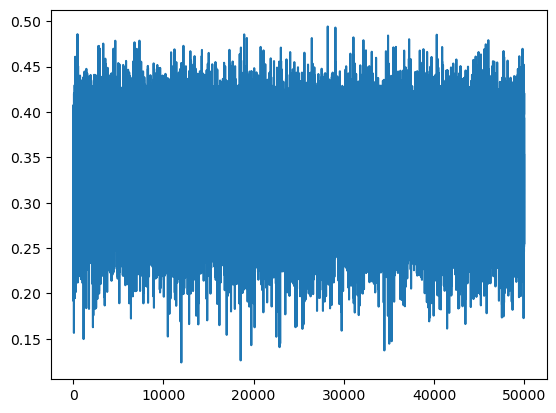

In [166]:
plt.plot(stepi, lossi)

In [167]:
emb = C[Xdev]  # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1940, grad_fn=<NllLossBackward0>)

In [168]:
emb = C[Xtr]  # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1552, grad_fn=<NllLossBackward0>)

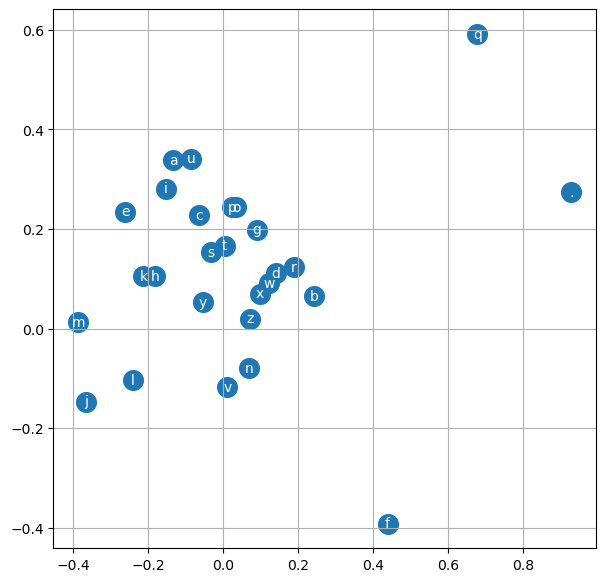

In [169]:
plt.figure(figsize=(7, 7))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [171]:
# sample from the model
g = torch.Generator().manual_seed(214743647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ....
    while True:
        emb = C[torch.tensor([context])] # (1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
        
    print(''.join(itos[i] for i in out))

roantel.
harlei.
lian.
emmaleigh.
gal.
ber.
ellin.
ailia.
cyarah.
esty.
yandrich.
sameerriiari.
lolept.
alvina.
hadphreyane.
mayan.
pailei.
zen.
aus.
eli.
